In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
import pyEulerCurves as pyecc

# Load one image

(500, 1000)


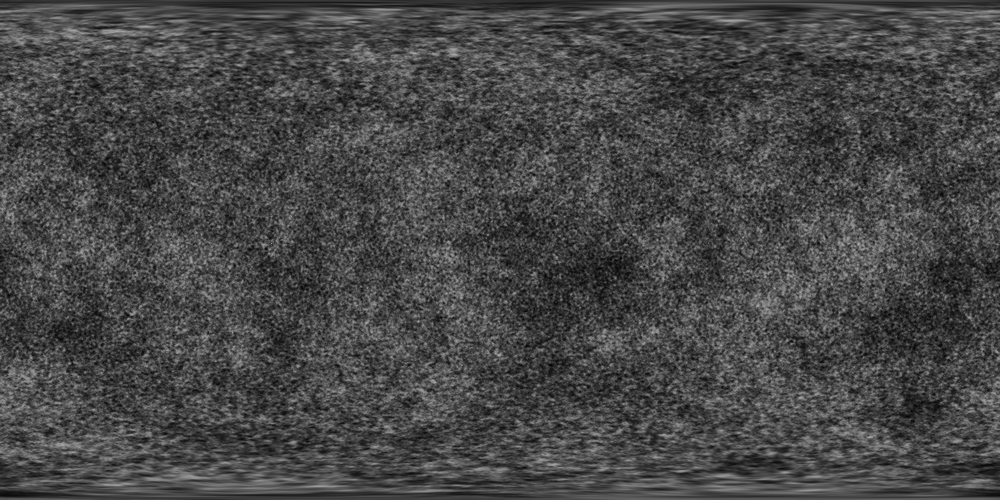

In [3]:
image_plank = Image.open("data/Planck.png")
plank_np = np.uint8(image_plank)
print(plank_np.shape)
image_plank

In [4]:
plank_np.max()

171

In [5]:
trans = pyecc.ECC_from_bitmap(periodic_boundary=False, 
                              workers=2    # number of CPU cores
                              )

In [6]:
%%time
ecc = trans.fit_transform(image_plank)

CPU times: user 86.5 ms, sys: 34.2 ms, total: 121 ms
Wall time: 854 ms


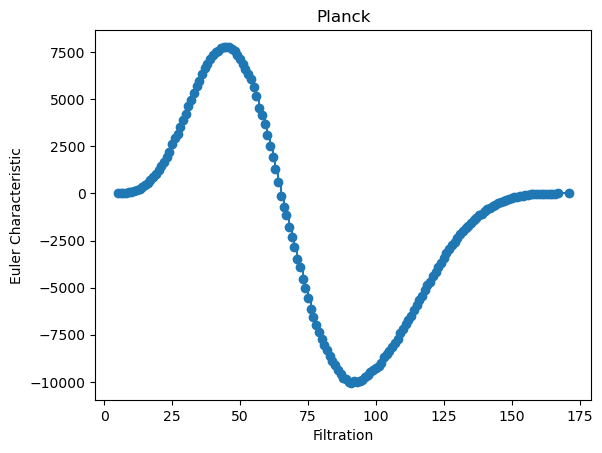

In [7]:
fig, axs = plt.subplots(1)

im0 = pyecc.plot_euler_curve(ecc, axs, with_lines=True)
axs.set_title('Planck')
plt.show()

In [8]:
# load the ECC computed by CHUNKYeuler and check if they are equal
# https://bitbucket.org/hubwag/chunkyeuler/src/master/

ch_ECC = pd.read_csv('data/Planck_t_u8_500x1000.raw.euler', 
                     sep = ' ',
                     header=None).values.astype(float)

assert(pyecc.difference_ECC(ecc, ch_ECC, 1000) == 0)

# Lets stack togheter 50 random frames

In [9]:
# # uncomment to generate a new image
# np.random.seed(42)

# how_many_layers = 50
# sidex = 100
# sidey = 200

# image_np = np.random.randint(0, 256, size=(how_many_layers, sidey, sidex))
    
# image_np.shape

# with open('data/50x200x100.npy', 'wb') as f:
#     np.save(f, image_np)

In [10]:
# load the 3d array
with open('data/50x200x100.npy', 'rb') as f:
    image_np = np.load(f)

image_np.shape

(50, 200, 100)

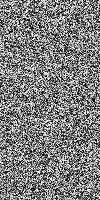

In [11]:
# this is the first frame
im = Image.fromarray(np.uint8(image_np[0]))
im

In [12]:
# # save images to disk
# for i in (range(len(image_np))):
#     current_img = Image.fromarray(np.uint8(image_np[i]))
#     current_img.save('to_convert/{:05d}.png'.format(i))

In [13]:
%%time
trans = pyecc.ECC_from_bitmap(periodic_boundary=False, 
                              workers=2    # number of CPU cores
                              )
ecc = trans.fit_transform(image_np)

CPU times: user 21.3 ms, sys: 20.9 ms, total: 42.2 ms
Wall time: 1.39 s


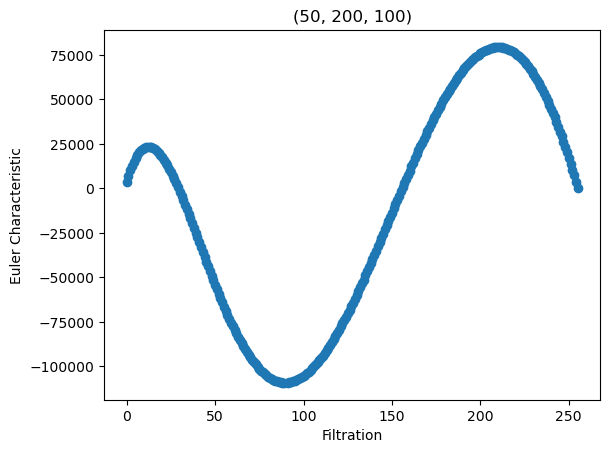

In [14]:
fig, axs = plt.subplots(1)

im0 = pyecc.plot_euler_curve(ecc, axs, with_lines=True)
axs.set_title("{}".format(image_np.shape))
plt.show()

In [15]:
# load the ECC computed by CHUNKYeuler and check if they are equal
# https://bitbucket.org/hubwag/chunkyeuler/src/master/

ch_ECC = pd.read_csv('data/00000.png_t_u8_50x200x100.from_stack.raw.euler', 
                     sep = ' ',
                     header=None).values.astype(float)

assert(pyecc.difference_ECC(ch_ECC, ecc, 1000) == 0)

# Periodic boundary conditions

In [16]:
# load the 3d array
with open('data/50x200x100.npy', 'rb') as f:
    image_np = np.load(f)

image_np.shape

(50, 200, 100)

In [17]:
%%time
# periodic boundary only on the x axis
boundary = [False, False, True]

trans = pyecc.ECC_from_bitmap(periodic_boundary=boundary, 
                              workers=2    # number of CPU cores
                              )
ecc_1T = trans.fit_transform(image_np)

CPU times: user 18 ms, sys: 20.2 ms, total: 38.2 ms
Wall time: 1.5 s


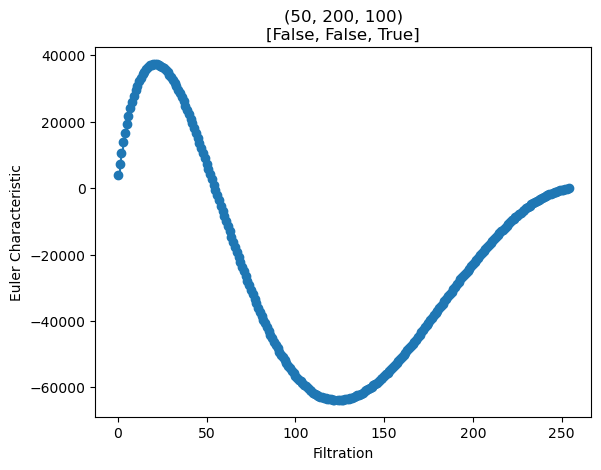

In [18]:
fig, axs = plt.subplots(1)

im0 = pyecc.plot_euler_curve(ecc_1T, axs, with_lines=True)
axs.set_title("{}\n{}".format(image_np.shape, boundary))
plt.show()

In [19]:
%%time
# periodic boundary everywhere
boundary = [True, True, True]

trans = pyecc.ECC_from_bitmap(periodic_boundary=boundary, 
                              workers=2    # number of CPU cores
                              )
ecc_3T = trans.fit_transform(image_np)

CPU times: user 16.7 ms, sys: 20.5 ms, total: 37.1 ms
Wall time: 1.33 s


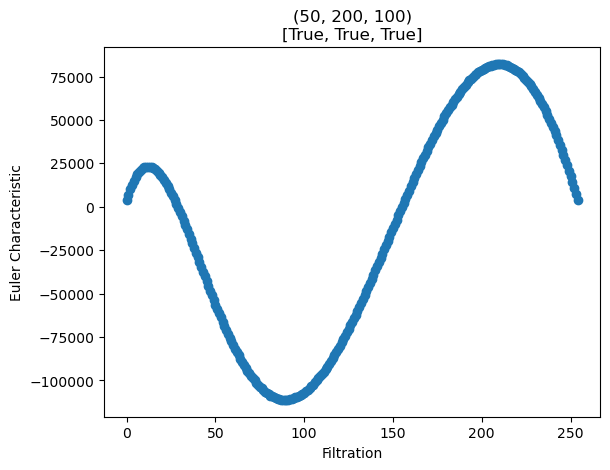

In [20]:
fig, axs = plt.subplots(1)

im0 = pyecc.plot_euler_curve(ecc_3T, axs, with_lines=True)
axs.set_title("{}\n{}".format(image_np.shape, boundary))
plt.show()

In [21]:
# we expect the two curves to be different
assert(pyecc.difference_ECC(ecc_1T, ecc_3T, 1000) != 0)
print(pyecc.difference_ECC(ecc_1T, ecc_3T, 1000))

16758417.0
